# Spam-Ham Classifier

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../Spam_Detector/SMSSpamCollection',delimiter='\t',header=None)

In [4]:
df[0].value_counts()

ham     4825
spam     747
Name: 0, dtype: int64

In [5]:
df.isna().sum()

0    0
1    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       5572 non-null   object
 1   1       5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


### Tranforming Text Data

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV,cross_val_score,train_test_split
x = df[1]
y = df[0]

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=31)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(x_train)

(4179,)
(1393,)
(4179,)
209     You please give us connection today itself bef...
3057                             Webpage s not available!
5201    YOU VE WON! Your 4* Costa Del Sol Holiday or £...
3761                       We'll join the  &lt;#&gt;  bus
1136                      K do I need a login or anything
                              ...                        
826            Hmm .. Bits and pieces lol ... *sighs* ...
3735                    4 tacos + 1 rajas burrito, right?
2942    My supervisor find 4 me one lor i thk his stud...
2064    URGENT! Your mobile No *********** WON a £2,00...
4818    Me too. Mark is taking forever to pick up my p...
Name: 1, Length: 4179, dtype: object


In [9]:
transformer = TfidfVectorizer(lowercase=True,ngram_range=(1,1),norm='l1',strip_accents='ascii',stop_words='english')

In [10]:
x_train_trans = transformer.fit_transform(x_train).toarray()
x_test_trans = transformer.transform(x_test).toarray()

In [11]:
print(x_train_trans.shape)

(4179, 7265)


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score

2022-07-14 22:17:10.148918: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-14 22:17:10.148937: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [13]:
def transform(y_val):
    y_new = [1.0 if i=='spam' else 0.0 for i in y_val]
    return y_new

In [14]:
y_train = np.array(transform(y_train))
y_test = np.array(transform(y_test))
print(y_train.shape)

(4179,)


## Model Training:

In [19]:
model = Sequential()
model.add(Dense(64,activation='relu',input_shape=[x_test_trans.shape[1],],kernel_initializer='uniform'))
model.add(Dense(64,activation='relu',kernel_initializer='uniform'))
model.add(Dense(1,activation='sigmoid',kernel_initializer='uniform'))
model.summary()
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                465024    
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 469,249
Trainable params: 469,249
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(x_train_trans,y_train,epochs=20,batch_size=128)
model.evaluate(x_test_trans,y_test)

Epoch 1/20
33/33 [==============================] - 0s 3ms/step - loss: 0.6646 - accuracy: 0.8593
Epoch 2/20
33/33 [==============================] - 0s 3ms/step - loss: 0.4442 - accuracy: 0.8662
Epoch 3/20
33/33 [==============================] - 0s 3ms/step - loss: 0.2777 - accuracy: 0.8662
Epoch 4/20
33/33 [==============================] - 0s 3ms/step - loss: 0.2002 - accuracy: 0.8662
Epoch 5/20
33/33 [==============================] - 0s 3ms/step - loss: 0.1518 - accuracy: 0.8662
Epoch 6/20
33/33 [==============================] - 0s 3ms/step - loss: 0.1249 - accuracy: 0.8662
Epoch 7/20
33/33 [==============================] - 0s 3ms/step - loss: 0.1108 - accuracy: 0.8662
Epoch 8/20
33/33 [==============================] - 0s 3ms/step - loss: 0.1045 - accuracy: 0.8662
Epoch 9/20
33/33 [==============================] - 0s 3ms/step - loss: 0.1001 - accuracy: 0.9732
Epoch 10/20
33/33 [==============================] - 0s 3ms/step - loss: 0.0969 - accuracy: 0.9947
Epoch 11/20
33/33 [

[0.14082446694374084, 0.9720028638839722]

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,classification_report

In [22]:
y_mlp_pred = np.round(model.predict(x_test_trans,batch_size=128,verbose=0),0)
print(y_test.shape)
y_mlp_pred.shape

(1393,)


(1393, 1)

MLP Model


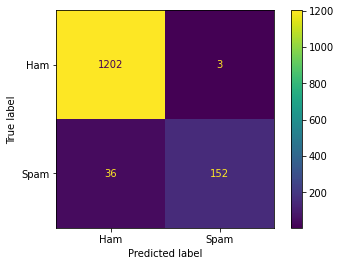

In [23]:
print("MLP Model")
ConfusionMatrixDisplay(confusion_matrix(y_test,y_mlp_pred),display_labels=['Ham','Spam']).plot()

In [24]:
np.unique(y_test)

array([0., 1.])

In [25]:
model_json = model.to_json()

In [26]:
with open('spam_ham_model_MLP.json','w') as json_file:
    json_file.write(model_json)

In [27]:
model.save_weights("spam_ham_model_MLP.h5")
print("Model Saved to Disk")

Model Saved to Disk


In [28]:
from sklearn.pipeline import Pipeline
from keras.models import model_from_json
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')

In [29]:
import pickle

In [30]:
pickle.dump(model, open('spam_MLP.sav','wb'))
pickle.dump(transformer, open('spam_tfidf_vect.sav','wb'))

INFO:tensorflow:Assets written to: ram://8e04211a-7723-4d30-affa-aa9f6b29141c/assets


In [31]:
def predictions(text):
    transform_text = transformer.transform([text]).toarray()
    print(transform_text.shape)
    json_file = open('spam_ham_model_MLP.json','r')
    loaded_model = json_file.read()
    json_file.close()
    model = model_from_json(loaded_model)
    model.load_weights('spam_ham_model_MLP.h5')
    y_predict = np.round(model.predict(transform_text),0)
    print(y_predict[0][0])
    result = 'spam' if y_predict[0][0]==1 else 'ham'
    return result

In [32]:
# input = ""
# print(predictions(input))